# Data Science in VS Code tutorial 

## Part 1. Prerequisites:
        Visual Studio Code
            Extensions:
                Python extension for VS Code
                Jupyter extension for VS Code
        Miniconda or Full Anaconda distribution

## Part 2. Set up a data science environment

### Installation

1. Clone the repository:

        git clone https://github.com/yourusername/yourproject.git

2. Navigate to the project directory:

        cd data-science-tutorial
   
3. Set up the Conda environment by using the yml from this repo:

        conda env create -f environment.yml

4. Activate the environment:

        conda activate myenv

## Part 3. Prepare the data

   - Play and clean the data
   - Check correlations
   - After preparation you will have a dataset that can be used for training a model
      - in this case we chose: 'sex', 'pclass','age','relatives','fare','survived'


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv('titanic3.csv')

<Axes: xlabel='survived', ylabel='fare'>

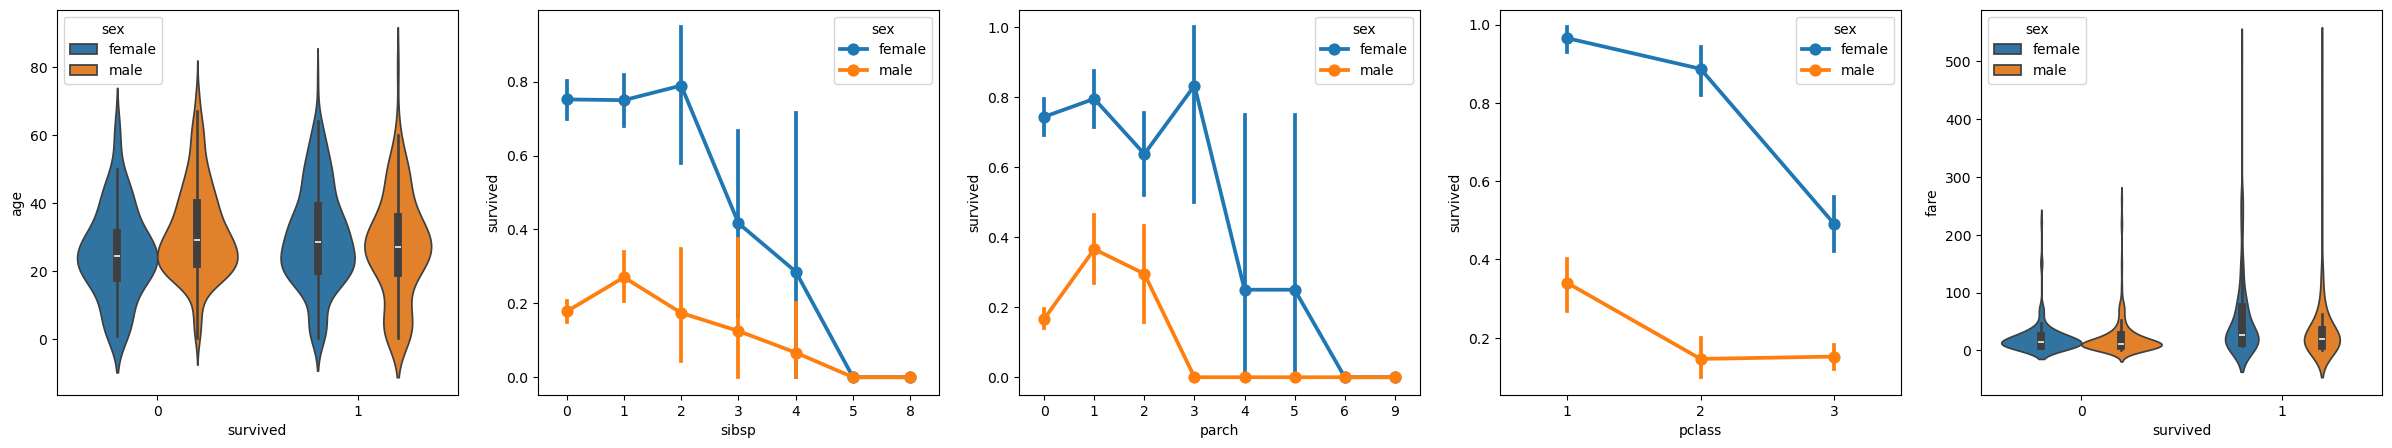

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

In [3]:
data.replace({'male': 1, 'female': 0}, inplace=True)

C:\Users\jarmo\AppData\Local\Temp\ipykernel_12152\2851430834.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace({'male': 1, 'female': 0}, inplace=True)


In [4]:
data.corr(numeric_only=True).abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055512
sibsp,0.027825
parch,0.082660
fare,0.244265
body,NaN


In [5]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
corr_with_survived = data.corr(numeric_only=True).abs()[["survived"]]
print(corr_with_survived)

           survived
pclass     0.312469
survived   1.000000
sex        0.528693
age        0.055512
sibsp      0.027825
parch      0.082660
fare       0.244265
body            NaN
relatives  0.201719


In [6]:
# use this if you want to choose specific columns for example to skip body that is not needed.
'''
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)

columns_to_check = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'relatives']

corr_matrix = data[columns_to_check].corr()

corr_with_survived = corr_matrix[['survived']].abs()

print(corr_with_survived)
'''

"\ndata['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)\n\ncolumns_to_check = ['pclass', 'survived', 'sex', 'age', 'sibsp', 'parch', 'fare', 'relatives']\n\ncorr_matrix = data[columns_to_check].corr()\n\ncorr_with_survived = corr_matrix[['survived']].abs()\n\nprint(corr_with_survived)\n"

In [7]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()

In [8]:
# optional: use this to run the python file version.

# %run script.py

## Part 4. Train and evaluate a model

   - For this section use the scikit-learn library (as it offers some useful helper functions) to process the dataset, train a classification model to determinen survivability on the boat and then use the model with the test data to determinen its accuracy.

### 4.1 Divide dataset to training and validation data
   common first step to training a model is to divide the dataset to training and validation data. This allows you to use a portion of the data to train the model and a portion of the data to test the model. If you used all your data to train the model, you wouldn't have a way to estimate how well it would actually perform against data the model hasn't yet seen. A benefit of the scikit-learn library is that it provides a method specifically for splitting a dataset into training and test data. Add and run a cell with the following code to the notebook to split up the data.

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data[['sex','pclass','age','relatives','fare']], data.survived, test_size=0.2, random_state=0)

### 4.2 Normalize the inputs
   Next, normalize the inputs such that all features are treated equally. For example, within the dataset the values for age range from ~0-100, while gender is only a 1 or 0. By normalizing all the variables, you can ensure that the ranges of values are all the same. Use the following code in a new code cell to scale the input values.

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

### 4.3 Choose, create & train the algorithm
   There are many machine learning algorithms to choose from to model the data. The scikit-learn library provides support for many of [them](https://scikit-learn.org/stable/user_guide.html) and a [chart](https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html) to help select the one that's right for your scenario. For now, use the [Naïve Bayes algorithm](https://scikit-learn.org/stable/modules/naive_bayes.html), a common algorithm for classification problems. Add a cell with the following code to create and train the algorithm.

In [11]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

### 4.4 Try the trained model against the test data set
   With a trained model, you can now try it against the test data set that was held back from training. Add and run the following code to predict the outcome of the test data and calculate the accuracy of the model.

In [12]:
from sklearn import metrics
predict_test = model.predict(X_test)
print(metrics.accuracy_score(y_test, predict_test))

0.7464114832535885


## Part 5 (Optional) Use a neural network

   - A neural network is a model that uses weights and activation functions, modeling aspects of human neurons, to determine an outcome based on provided inputs. Unlike the machine learning algorithm you looked at previously, neural networks are a form of deep learning wherein you don't need to know an ideal algorithm for your problem set ahead of time. It can be used for many different scenarios and classification is one of them. For this section, you'll use the [Keras](https://keras.io/) library with [TensorFlow](https://www.tensorflow.org/) to construct the neural network, and explore how it handles the Titanic dataset.

### 5.1 Import libraries and create the model
   The first step is to import the required libraries and to create the model. In this case, you'll use a [Sequential](https://keras.io/getting-started/sequential-model-guide/) neural network, which is a layered neural network wherein there are multiple layers that feed into each other in sequence.

In [13]:
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()


### 5.2 Create the layers of the neural network
   After defining the model, the next step is to add the layers of the neural network. For now, let's keep things simple and just use three layers. Add the following code to create the layers of the neural network.

In [14]:
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu', input_dim = 5))
model.add(Dense(5, kernel_initializer = 'uniform', activation = 'relu'))
model.add(Dense(1, kernel_initializer = 'uniform', activation = 'sigmoid'))

   - The first layer will be set to have a dimension of 5, since you have five inputs: sex, pclass, age, relatives, and fare.
   - The last layer must output 1, since you want a 1-dimensional output indicating whether a passenger would survive.
   - The middle layer was kept at 5 for simplicity, although that value could have been different.

The rectified linear unit (relu) activation function is used as a good general activation function for the first two layers, while the sigmoid activation function is required for the final layer as the output you want (of whether a passenger survives or not) needs to be scaled in the range of 0-1 (the probability of a passenger surviving).

You can also look at the summary of the model you built with this line of code:

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 66
Trainable params: 66
Non-trainable params: 0
_________________________________________________________________


### 5.3 Compile the created model: Build & train
   Once the model is created, it needs to be compiled. As part of this, you need to define what type of optimizer will be used, how loss will be calculated, and what metric should be optimized for. Add the following code to build and train the model. You'll notice that after training, the accuracy is ~61%.

   Note: This step may take anywhere from a few seconds to a few minutes to run depending on your machine.

In [16]:
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=32, epochs=50)

Epoch 1/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6923 - accuracy: 0.5801
Epoch 2/50
27/27 [==============================] - 0s 688us/step - loss: 0.6898 - accuracy: 0.5861
Epoch 3/50
27/27 [==============================] - 0s 324us/step - loss: 0.6852 - accuracy: 0.5861
Epoch 4/50
27/27 [==============================] - 0s 1ms/step - loss: 0.6766 - accuracy: 0.5933
Epoch 5/50
27/27 [==============================] - 0s 636us/step - loss: 0.6611 - accuracy: 0.7213
Epoch 6/50
27/27 [==============================] - 0s 637us/step - loss: 0.6382 - accuracy: 0.7500
Epoch 7/50
27/27 [==============================] - 0s 637us/step - loss: 0.6088 - accuracy: 0.7656
Epoch 8/50
27/27 [==============================] - 0s 714us/step - loss: 0.5773 - accuracy: 0.7715
Epoch 9/50
27/27 [==============================] - 0s 534us/step - loss: 0.5480 - accuracy: 0.7715
Epoch 10/50
27/27 [==============================] - 0s 607us/step - loss: 0.5243 - accuracy: 0.7775
Epo

### 5.4 Test the created model against test data
   Now that the model is built and trained, we can see how it works against the test data.

In [17]:
y_pred = np.rint(model.predict(X_test).flatten())
print(metrics.accuracy_score(y_test, y_pred))

7/7 [==============================] - 0s 669us/step
0.7990430622009569


   Similar to the training, you'll notice that you now have 79% accuracy in predicting survival of passengers. Using this simple neural network, the result is better than the 75% accuracy from the Naive Bayes Classifier tried previously.


## Next steps

   Now that you're familiar with the basics of performing machine learning within Visual Studio Code, here are some other Microsoft resources and tutorials to check out.

   - [Data Science profile template](https://code.visualstudio.com/docs/editor/profiles#_data-science-profile-template) - Create a new [profile](https://code.visualstudio.com/docs/editor/profiles) with a curated set of extensions, settings, and snippets.
   - Learn more about working with [Jupyter Notebooks in Visual Studio Code](https://youtu.be/FSdIoJdSnig) (video).
   - [Get started with Azure Machine Learning for VS Code](https://learn.microsoft.com/azure/machine-learning/how-to-setup-vs-code) to deploy and optimize your model using the power of Azure.
   - Find more data to explore on [Azure Open Data Sets](https://azure.microsoft.com/services/open-datasets/).